# word2vec

2章では「カウントベース」の手法によって単語の分散表現を得た. この章では「推論ベースの手法」によって表現する方法を学ぶ. 具体的にはシンプルなword2vecを実装していく. これは実用には耐えられない. 本物は次の章で実装する. 

## 推論ベースの手法とニューラルネットワーク

### カウントベースの手法の問題点

大規模コーパスにおいてカウントベースの手法に問題が生じる. 
例えば英語の語彙だけでも100万語を超える. つまり、英語全体を対象した場合には100万x100万の行列を作成することになる. 巨大な行列に対するＳＶＤは現実的ではない. 

それに対して推論ベースの手法だとミニバッチ処理を行うことが可能である. 


### 推論ベースの手法の概要

推論ベースのおいても原理は分散仮説である。注目した単語の側にある単語が入力となり、出力としてはどの単語が出やすいかを出す. 

### ニューラルネットワークにおける単語の処理方法

単語を「固定長のベクトル」に変換する必要がある。これには単語を**one-hot**表現へと変換することが必要となる. 

## シンプルなword2vec

word2vecは正しくはCBOWモデルと、skip-gramモデルという2つのモデルが使われたニューラルネットワークを指す. ここではCBOWモデルを中心に説明する. 

### CBOWモデルの推論処理

コンテキストの大きさと同じ数だけ入力層を存在させるというモデル. 中間層では入力層からの出力の平均値を入力値として用いる. 

In [4]:
%run pynet/cbow_predict.py

[[ 0.09232861 -3.06521573  4.97397528 -1.11957174  4.35283157 -2.57315918
  -1.33674866]]


### CBOWモデルの学習

前述の推論はスコアであったが、ここではスコアにSoftmax関数を適用することで「確率」を得ることができる. 


### word2vecの重みと分散表現

word2vecの分散表現は、入力層や出力層の重みそのものとなる。そして、一般には入力層の重みのみを、単語の分散表現として扱う. 

## 学習データ

「You say goodbye and I say hello」という1つの文をコーパスとしてあつかう. 


### コンテキストターゲット

word2vecのニューラルネットワークにおける入力は「コンテキスト」である. そしてその正解ラベルは、コンテキストに囲まれた中央との単語ーーここではこれを「ターゲット」と呼びますーーになります。つまり、私たちが行うべきことは、ニューラルネットワークに「コンテキスト」を入力したおときに「ターゲット」が出現する確率を高くすることになる。

In [1]:
from pynet.util import preprocess, create_contexts_target

In [2]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)

[0 1 2 3 4 1 5 6]


In [3]:
print(id_to_word)

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [6]:
contexts, target = create_contexts_target(corpus, windows_size=1)

In [7]:
print(contexts)

[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]


In [9]:
print(target)

[1 2 3 4 1 5]


### one-hot表現への変換

上記の処理でidの位置がわかった。idの位置はone-hot表現へ変化する. 


In [1]:
from pynet.util import preprocess, create_contexts_target, convert_one_hot

In [2]:
text = 'You say gooodbye and i say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

contexts, target = create_contexts_target(corpus, windows_size = 1)

In [3]:
vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

In [4]:
contexts

array([[[1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0]],

       [[0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1]]])

## Cbowの実装

In [2]:
%matplotlib inline

| epoch 1 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 2 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 3 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 4 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 5 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 6 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 7 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 8 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 9 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 10 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 11 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 12 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 13 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 14 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 15 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 16 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 17 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 18 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 19 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 20 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 21 |  iter 1 / 2 | ti

| epoch 264 |  iter 1 / 2 | time 0[s] | loss 1.15
| epoch 265 |  iter 1 / 2 | time 0[s] | loss 0.96
| epoch 266 |  iter 1 / 2 | time 0[s] | loss 1.13
| epoch 267 |  iter 1 / 2 | time 0[s] | loss 1.01
| epoch 268 |  iter 1 / 2 | time 0[s] | loss 0.97
| epoch 269 |  iter 1 / 2 | time 0[s] | loss 1.04
| epoch 270 |  iter 1 / 2 | time 0[s] | loss 0.93
| epoch 271 |  iter 1 / 2 | time 0[s] | loss 1.10
| epoch 272 |  iter 1 / 2 | time 0[s] | loss 1.13
| epoch 273 |  iter 1 / 2 | time 0[s] | loss 0.96
| epoch 274 |  iter 1 / 2 | time 0[s] | loss 1.00
| epoch 275 |  iter 1 / 2 | time 0[s] | loss 1.12
| epoch 276 |  iter 1 / 2 | time 0[s] | loss 0.92
| epoch 277 |  iter 1 / 2 | time 0[s] | loss 0.94
| epoch 278 |  iter 1 / 2 | time 0[s] | loss 1.01
| epoch 279 |  iter 1 / 2 | time 0[s] | loss 1.09
| epoch 280 |  iter 1 / 2 | time 0[s] | loss 1.04
| epoch 281 |  iter 1 / 2 | time 0[s] | loss 0.98
| epoch 282 |  iter 1 / 2 | time 0[s] | loss 0.93
| epoch 283 |  iter 1 / 2 | time 0[s] | loss 1.11


| epoch 511 |  iter 1 / 2 | time 0[s] | loss 0.80
| epoch 512 |  iter 1 / 2 | time 0[s] | loss 0.79
| epoch 513 |  iter 1 / 2 | time 0[s] | loss 0.64
| epoch 514 |  iter 1 / 2 | time 0[s] | loss 0.60
| epoch 515 |  iter 1 / 2 | time 0[s] | loss 0.88
| epoch 516 |  iter 1 / 2 | time 0[s] | loss 0.66
| epoch 517 |  iter 1 / 2 | time 0[s] | loss 0.64
| epoch 518 |  iter 1 / 2 | time 0[s] | loss 0.74
| epoch 519 |  iter 1 / 2 | time 0[s] | loss 0.72
| epoch 520 |  iter 1 / 2 | time 0[s] | loss 0.83
| epoch 521 |  iter 1 / 2 | time 0[s] | loss 0.59
| epoch 522 |  iter 1 / 2 | time 0[s] | loss 0.79
| epoch 523 |  iter 1 / 2 | time 0[s] | loss 0.72
| epoch 524 |  iter 1 / 2 | time 0[s] | loss 0.78
| epoch 525 |  iter 1 / 2 | time 0[s] | loss 0.72
| epoch 526 |  iter 1 / 2 | time 0[s] | loss 0.63
| epoch 527 |  iter 1 / 2 | time 0[s] | loss 0.80
| epoch 528 |  iter 1 / 2 | time 0[s] | loss 0.65
| epoch 529 |  iter 1 / 2 | time 0[s] | loss 0.78
| epoch 530 |  iter 1 / 2 | time 0[s] | loss 0.52


| epoch 748 |  iter 1 / 2 | time 1[s] | loss 0.59
| epoch 749 |  iter 1 / 2 | time 1[s] | loss 0.67
| epoch 750 |  iter 1 / 2 | time 1[s] | loss 0.58
| epoch 751 |  iter 1 / 2 | time 1[s] | loss 0.45
| epoch 752 |  iter 1 / 2 | time 1[s] | loss 0.67
| epoch 753 |  iter 1 / 2 | time 1[s] | loss 0.57
| epoch 754 |  iter 1 / 2 | time 1[s] | loss 0.68
| epoch 755 |  iter 1 / 2 | time 1[s] | loss 0.37
| epoch 756 |  iter 1 / 2 | time 1[s] | loss 0.68
| epoch 757 |  iter 1 / 2 | time 1[s] | loss 0.49
| epoch 758 |  iter 1 / 2 | time 1[s] | loss 0.56
| epoch 759 |  iter 1 / 2 | time 1[s] | loss 0.57
| epoch 760 |  iter 1 / 2 | time 1[s] | loss 0.68
| epoch 761 |  iter 1 / 2 | time 1[s] | loss 0.54
| epoch 762 |  iter 1 / 2 | time 1[s] | loss 0.67
| epoch 763 |  iter 1 / 2 | time 1[s] | loss 0.49
| epoch 764 |  iter 1 / 2 | time 1[s] | loss 0.57
| epoch 765 |  iter 1 / 2 | time 1[s] | loss 0.45
| epoch 766 |  iter 1 / 2 | time 1[s] | loss 0.59
| epoch 767 |  iter 1 / 2 | time 1[s] | loss 0.57


| epoch 996 |  iter 1 / 2 | time 1[s] | loss 0.36
| epoch 997 |  iter 1 / 2 | time 1[s] | loss 0.45
| epoch 998 |  iter 1 / 2 | time 1[s] | loss 0.50
| epoch 999 |  iter 1 / 2 | time 1[s] | loss 0.47
| epoch 1000 |  iter 1 / 2 | time 1[s] | loss 0.33


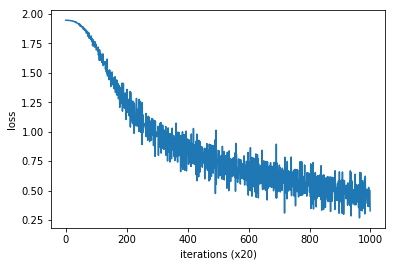

In [3]:
%run cbow/train.py

In [5]:
import numpy as np
a = np.random.randn(3,5)
np.sum(a, axis=0)

array([ 0.81430882, -2.24117166, -0.24107336, -0.01791811,  0.2719206 ])